# OIBSIP - DATA SCIENCE INTERNSHIP

# Task4 - Email spam Detection with Machine Learning

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.



In this Project, I used Python to build an email spam detector. Then, used machine learning to train the spam detector to recognize and classify emails into spam and non-spam. 

## Intern - Shweta Alukuru Trikutam

# 1. Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding the Dataset

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.shape

(5572, 5)

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# 3. Data Preprocessing

## 3.1 Checking missing values

In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## 3.2 Drop the unnecessary columns

In [10]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

> No missing values present

## 3.3 Rename the remaining columns for better clarity

In [13]:
df.columns = ['label', 'text']

In [14]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 3.4 Converting labels to binary values: 'ham' -> 0 and 'spam' -> 1

In [15]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [16]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 4. EDA

## 4.1 Analyzing the distribution of the 'spam' and 'ham' labels.

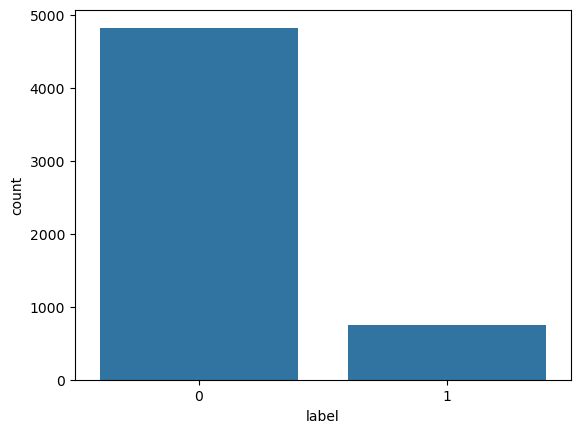

In [17]:
# Plot the distribution of spam and ham
sns.countplot(x='label', data=df)
plt.show()

## 4.2 Checking the length of email texts to understand their structure.

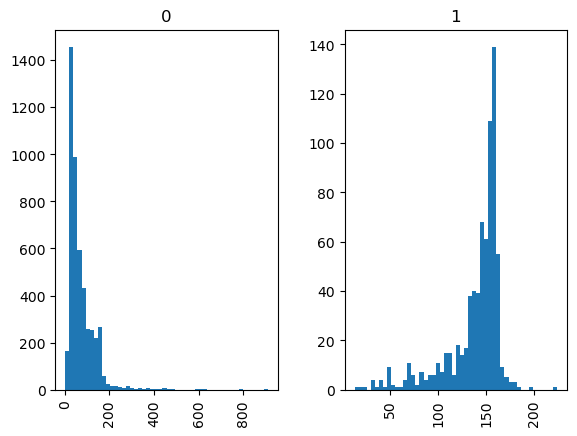

In [18]:
df['text_length'] = df['text'].apply(len)
df['text_length'].hist(by=df['label'], bins=50)
plt.show()

## 4.3 Message Length Analysis

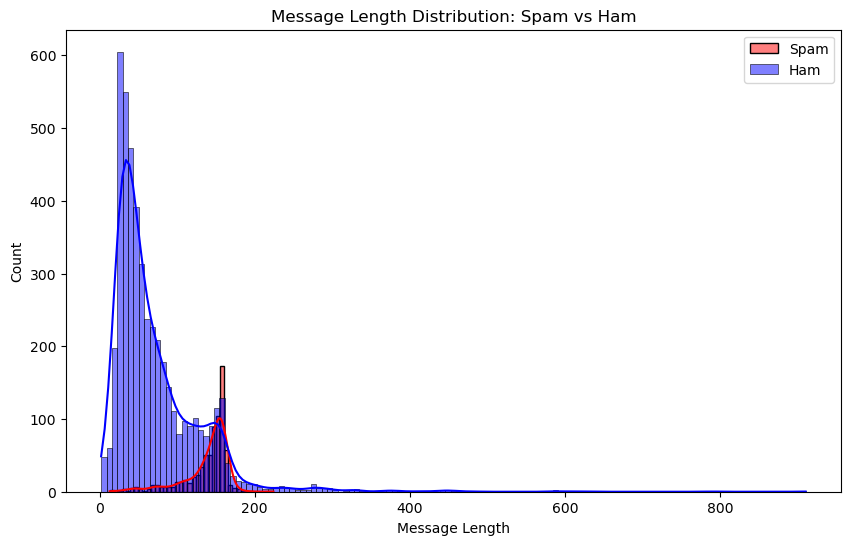

In [19]:
# Distribution of message lengths in spam vs. ham

plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 1]['text_length'], color='red', label='Spam', kde=True)
sns.histplot(df[df['label'] == 0]['text_length'], color='blue', label='Ham', kde=True)
plt.title('Message Length Distribution: Spam vs Ham')
plt.xlabel('Message Length')
plt.legend()
plt.show()


# 5. Text Preprocessing

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

# Load stopwords
stop_words = stopwords.words('english')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Labels
y = df['label'].values


## 5.1 Common Words in Spam vs Ham

In [21]:
from collections import Counter

# Find most common words in spam messages
spam_words_list = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
spam_common_words = Counter(spam_words_list).most_common(10)

# Find most common words in ham messages
ham_words_list = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
ham_common_words = Counter(ham_words_list).most_common(10)

# Display the common words
print("Top 10 common words in Spam messages:", spam_common_words)
print("Top 10 common words in Ham messages:", ham_common_words)


Top 10 common words in Spam messages: [('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('claim', 113)]
Top 10 common words in Ham messages: [('u', 972), ('im', 449), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 247), ('ur', 240), ('ill', 236)]


## 5.2 Word Cloud Analysis

#### Visualizing the most common words used in spam and ham messages can reveal patterns.

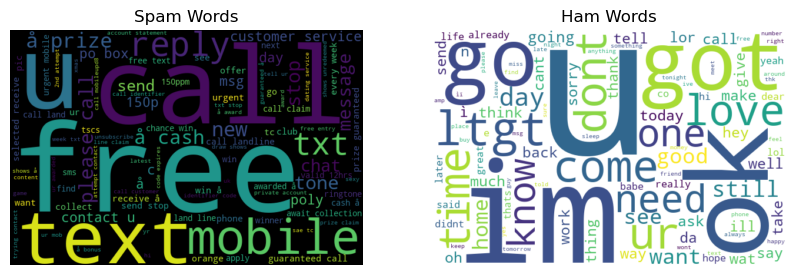

In [22]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
spam_wordcloud = WordCloud(width=600, height=400, max_words=100, background_color='black').generate(spam_words)

# Word cloud for ham messages
ham_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
ham_wordcloud = WordCloud(width=600, height=400, max_words=100, background_color='white').generate(ham_words)

# Display the word clouds
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')

plt.show()


## 5.3 TF-IDF Feature Correlation with Labels

In [23]:
# Create a DataFrame with TF-IDF features
tfidf_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Add the labels
tfidf_df['label'] = y

# Calculate the correlation matrix
correlation_matrix = tfidf_df.corr()

# Find the correlation of each word with the label
word_label_correlation = correlation_matrix['label'].sort_values(ascending=False)

# Display top 10 words most correlated with spam
print("Top 10 words correlated with spam:\n", word_label_correlation.head(10))


Top 10 words correlated with spam:
 label         1.000000
txt           0.346058
claim         0.344471
prize         0.299268
mobile        0.297291
free          0.295114
urgent        0.255166
call          0.246149
guaranteed    0.239361
stop          0.233899
Name: label, dtype: float64


# 6. Model Building

### Naive Bayes Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9761
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.82      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672

